In [356]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [357]:
from sklearn.model_selection import train_test_split
from soluciones_helper import plot_boundaries, get_polynimial_set
import matplotlib.pyplot as plt
import numpy as np

In [358]:
# Importo modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Obtengo dataset

In [525]:
# Cargo dataset
dataset = np.genfromtxt('./student_admission.txt', delimiter=',')
dataset = np.genfromtxt('./chip_tests.txt', delimiter=',')
print('Dimensión dataset:',student_admission.shape)
# Imprimo primeros 10 elementos
print(dataset[:10])

Dimensión dataset: (100, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]
 [-0.39804   0.034357  1.      ]
 [-0.30588  -0.19225   1.      ]
 [ 0.016705 -0.40424   1.      ]
 [ 0.13191  -0.51389   1.      ]]


In [526]:
# Las dos primeras columnas corresponden a las notas de los exámenes
X = dataset[:,0:2]
# La última columna corresponde a aprobado o no aprobado (1 o 0)
y = dataset[:,2]

In [527]:
# Divido el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Naive Bayes
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [528]:
# Defino el modelo de clasificación como Naive Bayes Gaussiano
clf_bayes = GaussianNB()
# Entreno el modelo con el dataset de entrenamiento
clf_bayes.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_bayes = clf_bayes.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_bayes = clf_bayes.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_bayes)
print('Train Accuracy (Exactitud):',score_train_bayes)
print('means class 1 (no aprobados):',clf_bayes.theta_[0,:])
print('means class 2 (aprobados):',clf_bayes.theta_[1,:])
print('vars class 1 (no aprobados):',clf_bayes.sigma_[0,:])
print('vars class 2 (aprobados):',clf_bayes.sigma_[1,:])

Test Accuracy (Exactitud): 0.729166666667
Train Accuracy (Exactitud): 0.742857142857
means class 1 (no aprobados): [ 0.03646724  0.16141278]
means class 2 (aprobados): [ -5.29212121e-05   2.18211848e-01]
vars class 1 (no aprobados): [ 0.30766447  0.34489556]
vars class 2 (aprobados): [ 0.14368591  0.18397547]


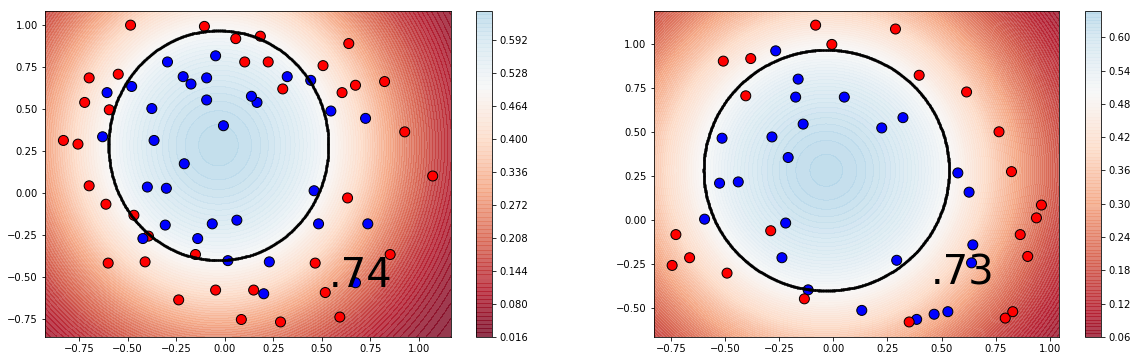

In [529]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_bayes, clf_bayes.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_bayes, clf_bayes.predict_proba, ax=ax2)
plt.show()

# Regresión logística
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [530]:
# Defino el modelo de clasificación como Regresion Logistica
C1 = 10
clf_logist = LogisticRegression(C=C1, fit_intercept=True)

# Entreno el modelo con el dataset de entrenamiento
clf_logist.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_logist = clf_logist.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_logist = clf_logist.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_logist)
print('Train Accuracy (Exactitud):',score_train_logist)
print('coeficientes:', clf_logist.coef_)
print('intercept:', clf_logist.intercept_)

Test Accuracy (Exactitud): 0.4375
Train Accuracy (Exactitud): 0.5
coeficientes: [[-0.1375642   0.19572943]]
intercept: [-0.14823912]


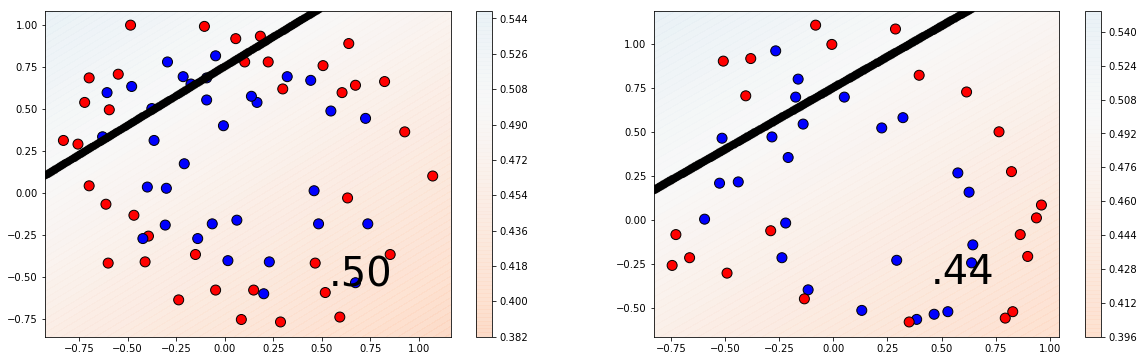

In [531]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_logist, clf_logist.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_logist, clf_logist.predict_proba, ax=ax2)

B = -clf_logist.intercept_/clf_logist.coef_[0][1]
A = -clf_logist.coef_[0][0]/clf_logist.coef_[0][1]
X = np.linspace(35,83,50)
Y = A*X + B

ax1.plot(X, Y, marker='x')
plt.show()

# Regresion Logística polinomial

In [532]:
degree = 2
X_train_degree = get_polynimial_set(X_train, degree=degree)
X_test_degree = get_polynimial_set(X_test, degree=degree)

Grado 2

$\begin{bmatrix}w_0X_1^0X_2^0 & w_1X_1^1X_2^0 & w_2X_1^0X_2^1 & w_3X_1^2X_2^0 & w_4X_1^1X_2^1 & w_5X_1^0X_2^2\end{bmatrix}$

In [533]:
print(X_train_degree[:10])

[[  1.00000000e+00   2.29840000e-01  -4.11550000e-01   5.28264256e-02
   -9.45906520e-02   1.69373403e-01]
 [  1.00000000e+00   3.22000000e-01   6.92250000e-01   1.03684000e-01
    2.22904500e-01   4.79210063e-01]
 [  1.00000000e+00  -3.00120000e-01   2.70470000e-02   9.00720144e-02
   -8.11734564e-03   7.31540209e-04]
 [  1.00000000e+00   1.66470000e-01   5.38740000e-01   2.77122609e-02
    8.96840478e-02   2.90240788e-01]
 [  1.00000000e+00   9.26840000e-01   3.63300000e-01   8.59032386e-01
    3.36720972e-01   1.31986890e-01]
 [  1.00000000e+00  -3.63480000e-01   3.12130000e-01   1.32117710e-01
   -1.13453012e-01   9.74251369e-02]
 [  1.00000000e+00  -6.97580000e-01   4.16670000e-02   4.86617856e-01
   -2.90660659e-02   1.73613889e-03]
 [  1.00000000e+00  -3.05880000e-01  -1.92250000e-01   9.35625744e-02
    5.88054300e-02   3.69600625e-02]
 [  1.00000000e+00   4.60250000e-01   1.24270000e-02   2.11830062e-01
    5.71952675e-03   1.54430329e-04]
 [  1.00000000e+00  -8.30070000e-01  

In [534]:
# Defino el modelo de clasificación como Regresion Logistica
C1 = 10000 #C2 = 1
clf_logist_pol = LogisticRegression(C=C1, fit_intercept=False)

# Entreno el modelo con el dataset de entrenamiento
clf_logist_pol.fit(X_train_degree, y_train)

# Calculo el score (Exactitud) con el dataset de testeo
score_test_logist_pol = clf_logist_pol.score(X_test_degree, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_logist_pol = clf_logist_pol.score(X_train_degree, y_train)

print('Test Accuracy (Exactitud):',score_test_logist_pol)
print('Train Accuracy (Exactitud):',score_train_logist_pol)
print('coeficientes:', clf_logist_pol.coef_)
print('intercept:', clf_logist_pol.intercept_)

Test Accuracy (Exactitud): 0.854166666667
Train Accuracy (Exactitud): 0.828571428571
coeficientes: [[  4.74114118   3.16985858   4.2759037  -10.48245643  -6.63866844
  -11.91362974]]
intercept: 0.0


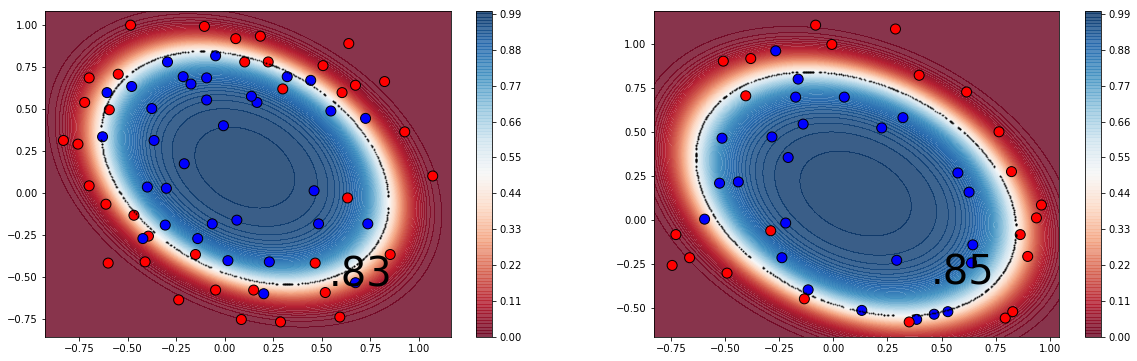

In [535]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax1)
plot_boundaries(X_test, y_test, score_test_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax2)
plt.show()

# Red Neuronal

In [390]:
from sklearn.neural_network import MLPClassifier

In [522]:
# Defino el modelo de clasificación como Regresion Logistica
# (hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, 
# max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08)[source]

clf_MPL = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50,50), activation='logistic', alpha=0.0, momentum=0, 
                        max_iter=1000, random_state=1)

# Entreno el modelo con el dataset de entrenamient
clf_MPL.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_MLP = clf_MPL.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_MPL = clf_MPL.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_MLP)
print('Train Accuracy (Exactitud):',score_train_MPL)
#print('coeficientes:', score_test_MLP.coef_)
#print('intercept:', score_test_MLP.intercept_)

Test Accuracy (Exactitud): 0.770833333333
Train Accuracy (Exactitud): 1.0


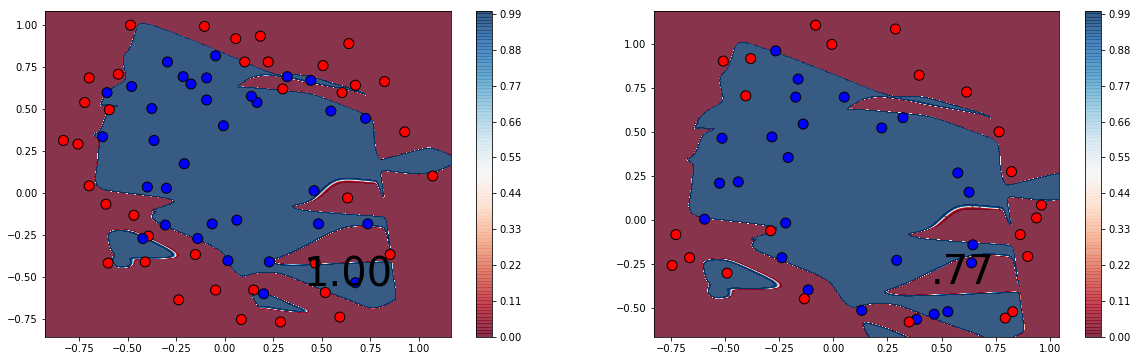

In [523]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_MPL, clf_MPL.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_MLP, clf_MPL.predict_proba, ax=ax2)

plt.show()